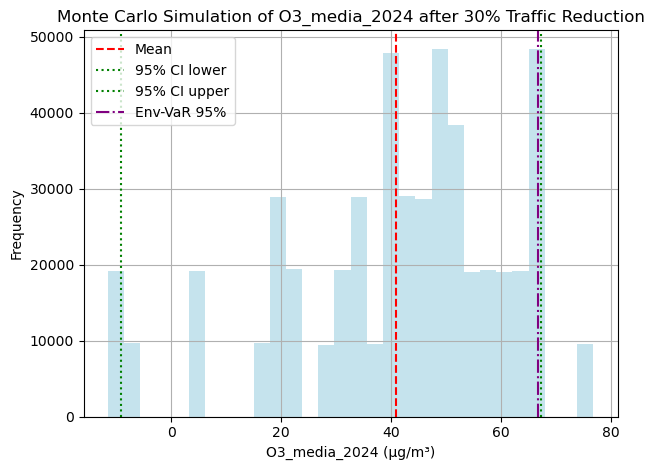

Risultati simulazione O3:
Media attesa: 40.97 µg/m³
Intervallo di confidenza 95%: [-9.07, 67.37]
Env-VaR 95%: 66.77 µg/m³
• Simulazioni effettuate: 500000


In [4]:
import pandas as pd
from simulate import simulate_pollution

# === 1. Carica i file ===
o3 = pd.read_excel("data/O3.xlsx")
traffico = pd.read_excel("data/traffico Astrade 2024.xlsx")

# === 2. Pulizia colonne ===
o3["data"] = pd.to_datetime(o3["data"], dayfirst=True)
o3["O3_media_2024"] = pd.to_numeric(o3["Media (2024)"], errors="coerce")

traffico["data"] = pd.to_datetime(traffico["data"], dayfirst=True)
traffico["traffico_media_2024"] = pd.to_numeric(traffico["Media (2024)"], errors="coerce")

# === 3. Merge per data ===
df = pd.merge(
    o3[["data", "O3_media_2024"]],
    traffico[["data", "traffico_media_2024"]],
    on="data"
).dropna()
N_SIM = 500000
# === 4. Simulazione Monte Carlo ===
results = simulate_pollution(
    df=df,
    pollutant_col="O3_media_2024",
    traffic_col="traffico_media_2024",
    reduction_pct=0.3,
    n_sim=N_SIM,
    plot=True
)

# === 5. Output a console ===
print("Risultati simulazione O3:")
print(f"Media attesa: {results['mean']:.2f} µg/m³")
print(f"Intervallo di confidenza 95%: [{results['ci_lower']:.2f}, {results['ci_upper']:.2f}]")
print(f"Env-VaR 95%: {results['env_var_95']:.2f} µg/m³")
print(f"• Simulazioni effettuate: {N_SIM}")
